<a href="https://colab.research.google.com/github/h3rp/Comparing-Decision-Tree-C4.5-and-Adaboost-on-Heart-Disease-Classification/blob/main/Thyroid_multiclass_classification_using_Machine_Learning_with_comparizing_logistic_regression_and_categorical_boosting_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BDC - Satria Data 2022/Project Journal/thyroidDF.csv')
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
df = df.drop(['patient_id','referral_source','query_on_thyroxine','TBG','TBG_measured','FTI_measured','TT4_measured','T4U_measured','TSH_measured','T3_measured','T3'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   on_antithyroid_meds  9172 non-null   object 
 4   sick                 9172 non-null   object 
 5   pregnant             9172 non-null   object 
 6   thyroid_surgery      9172 non-null   object 
 7   I131_treatment       9172 non-null   object 
 8   query_hypothyroid    9172 non-null   object 
 9   query_hyperthyroid   9172 non-null   object 
 10  lithium              9172 non-null   object 
 11  goitre               9172 non-null   object 
 12  tumor                9172 non-null   object 
 13  hypopituitary        9172 non-null   object 
 14  psych                9172 non-null   object 
 15  TSH                  8330 non-null   f

In [ ]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,128.0,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,S


In [ ]:
df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

In [ ]:
df['target'].unique()

array(['-', 'S', 1, 'AK', 'R', 'I', 0, 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
categories = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

df['target'] = df['target'].map(categories)
df.dropna(subset=['target'], inplace=True)

In [ ]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
0,29,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.3,NaN,NaN,NaN,negative
1,29,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,128.0,NaN,NaN,negative
2,41,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,negative
3,36,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,negative
5,60,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,negative


In [ ]:
df.isna().sum()

age                      0
sex                    243
on_thyroxine             0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                    722
TT4                    348
T4U                    663
FTI                    656
target                   0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.target = le.fit_transform(df.target)

In [ ]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
0,29,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.3,NaN,NaN,NaN,2
1,29,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,128.0,NaN,NaN,2
2,41,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,2
3,36,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2
5,60,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2


<Axes: >

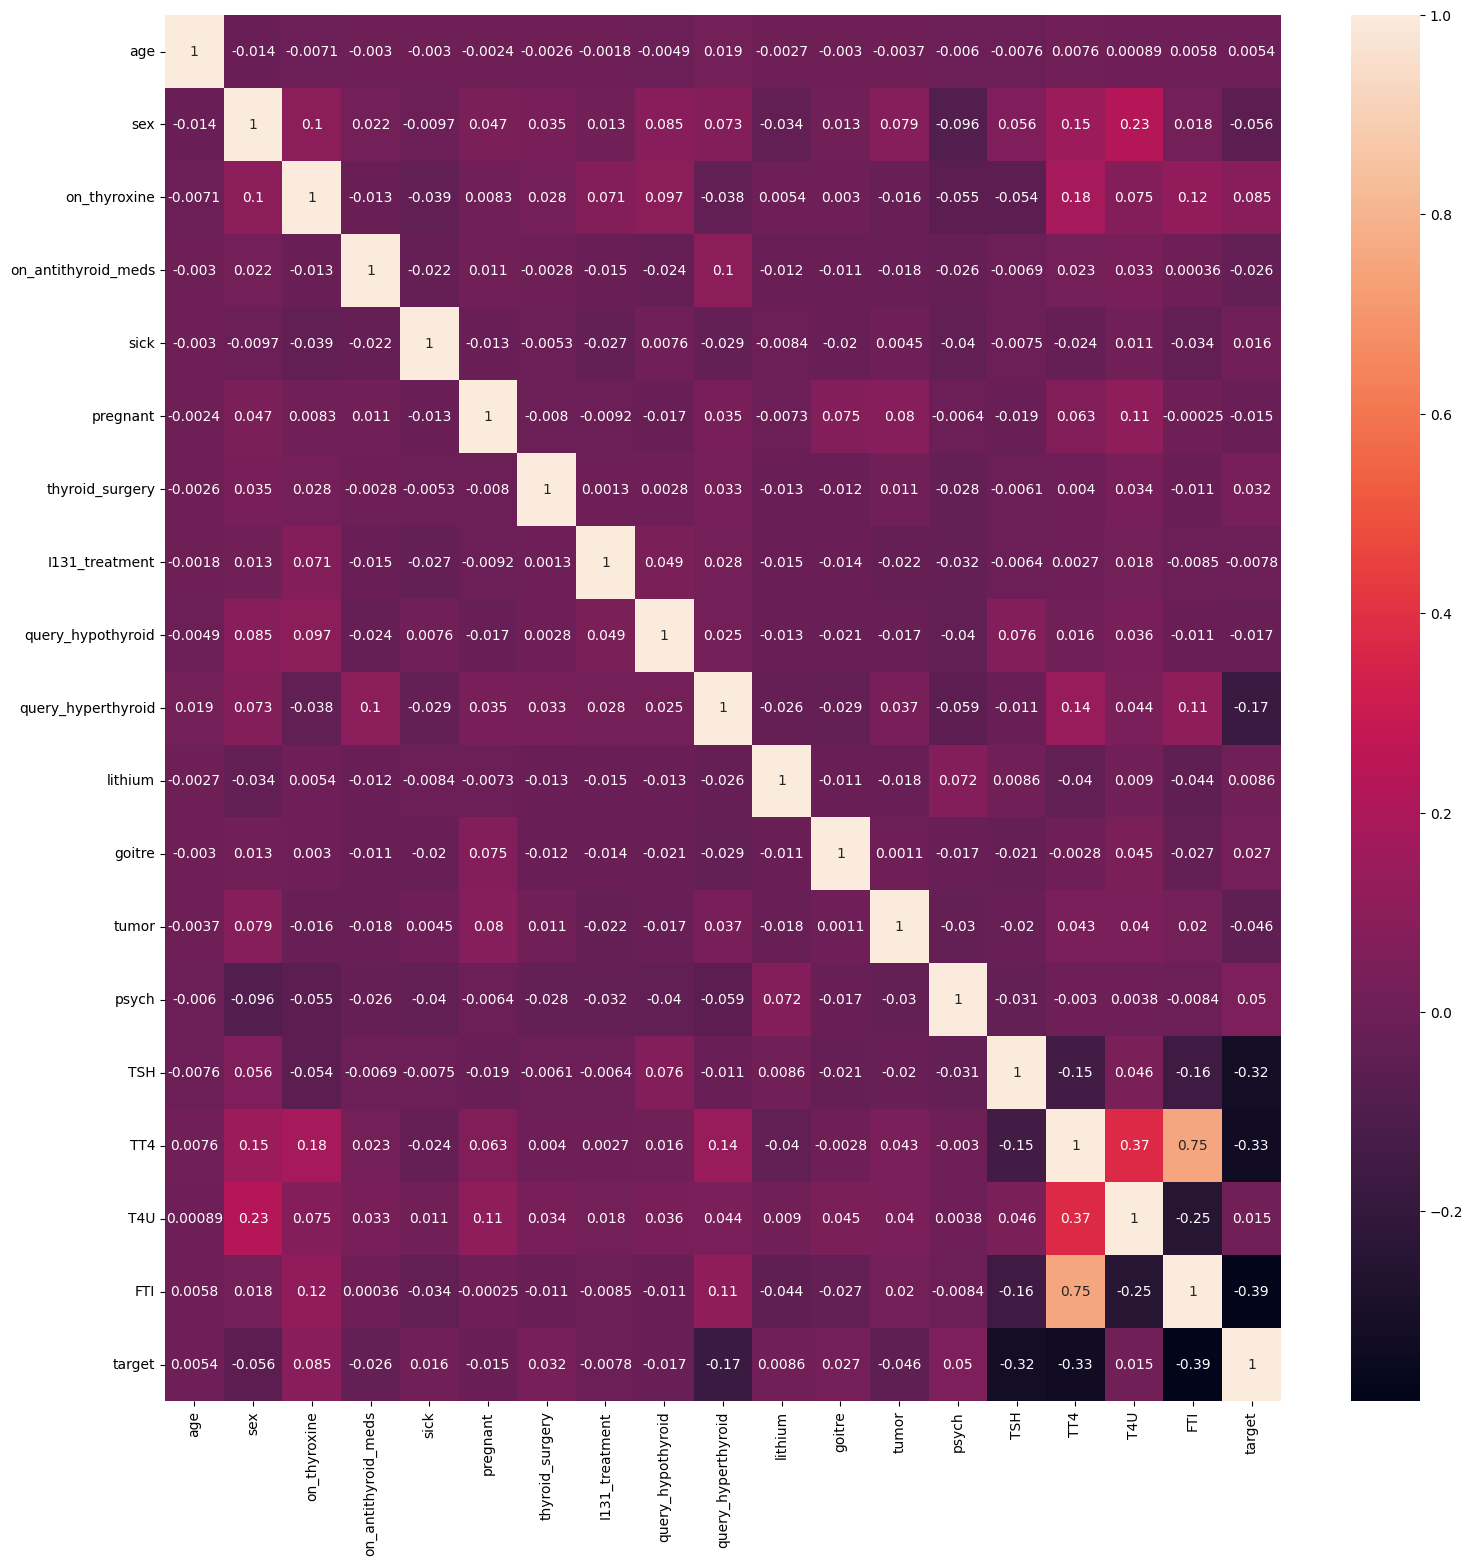

In [ ]:
fig= plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True)


In [ ]:
df = df.drop(columns='hypopituitary')

In [ ]:
(df.isna().sum()/df.sum())*100

age                     0.000000
sex                     5.141769
on_thyroxine            0.000000
on_antithyroid_meds     0.000000
sick                    0.000000
pregnant                0.000000
thyroid_surgery         0.000000
I131_treatment          0.000000
query_hypothyroid       0.000000
query_hyperthyroid      0.000000
lithium                 0.000000
goitre                  0.000000
tumor                   0.000000
psych                   0.000000
TSH                     4.710197
TT4                     0.046434
T4U                    10.333647
FTI                     0.087063
target                  0.000000
dtype: float64

In [ ]:
x = df.drop(columns='target')
y = df.target

In [ ]:
KnnImpute = KNNImputer(n_neighbors=5)
x = KnnImpute.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [ ]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(f'classsification report : \n {classification_report(y_test, y_pred)}')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'precision score: {precision}, recall score: {recall}')


classsification report : 
               precision    recall  f1-score   support

           0       0.79      0.44      0.57        52
           1       0.70      0.39      0.50        95
           2       0.96      0.99      0.97      2047

    accuracy                           0.95      2194
   macro avg       0.82      0.61      0.68      2194
weighted avg       0.94      0.95      0.94      2194

precision score: 0.9440332335142917, recall score: 0.95077484047402


# Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
print(f'classsification report : \n {classification_report(y_test, y_pred)}')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'precision score: {precision}, recall score: {recall}')

Learning rate set to 0.085999
0:	learn: 0.9519114	total: 54.7ms	remaining: 54.7s
1:	learn: 0.8382528	total: 61ms	remaining: 30.4s
2:	learn: 0.7450135	total: 67ms	remaining: 22.3s
3:	learn: 0.6683473	total: 72.9ms	remaining: 18.1s
4:	learn: 0.6035723	total: 78.7ms	remaining: 15.7s
5:	learn: 0.5491490	total: 84.6ms	remaining: 14s
6:	learn: 0.5006067	total: 90.8ms	remaining: 12.9s
7:	learn: 0.4595500	total: 96.9ms	remaining: 12s
8:	learn: 0.4215789	total: 103ms	remaining: 11.3s
9:	learn: 0.3880644	total: 109ms	remaining: 10.8s
10:	learn: 0.3579823	total: 115ms	remaining: 10.3s
11:	learn: 0.3328015	total: 121ms	remaining: 9.97s
12:	learn: 0.3094922	total: 127ms	remaining: 9.67s
13:	learn: 0.2881788	total: 133ms	remaining: 9.4s
14:	learn: 0.2700296	total: 140ms	remaining: 9.17s
15:	learn: 0.2523372	total: 146ms	remaining: 8.97s
16:	learn: 0.2369177	total: 152ms	remaining: 8.8s
17:	learn: 0.2224586	total: 158ms	remaining: 8.63s
18:	learn: 0.2095382	total: 164ms	remaining: 8.48s
19:	learn: 0.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(f'classsification report : \n {classification_report(y_test, y_pred)}')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'precision score: {precision}, recall score: {recall}')

classsification report : 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        52
           1       0.88      0.85      0.87        95
           2       0.99      0.99      0.99      2047

    accuracy                           0.98      2194
   macro avg       0.88      0.84      0.86      2194
weighted avg       0.98      0.98      0.98      2194

precision score: 0.9760566451590419, recall score: 0.9767547857793983
